In [ ]:
import os

""""
Devo code for all kinds of decoding analyses, inclduing:
[NOTE: all are time-resolved]
- default
- cross-generalization (at each time point)
- generalization over time
--- variation: single-trial covert.
- shared subspace (single decoder over time)

Inspired to do this mainly re: quyestion of evidence for single trial shape decoding during palnning, espeically for chars.
"""

# Load a pre-computed Snippets

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
animal = "Diego"
date = 230628
# question = "SP_shape_loc"
question = "PIG_planning_shape_loc"
list_time_windows = [(-0.6, 0.6)]
events_keep = ["03_samp", "04_go_cue", "06_on_strokeidx_0"]
combine_into_larger_areas = True
HACK_RENAME_SHAPES = False
DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                events_keep = events_keep,
                                HACK_RENAME_SHAPES=HACK_RENAME_SHAPES)

# Load a dataset (saved for Xuan)

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# this is the path to the dataset
# path = '/gorilla1/analyses/recordings/main/RSA/Diego-230615/agg_True-subtr_None-dist_euclidian_unbiased/SP_shape_loc/DFallpa.pkl'
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_samp_and_stroke.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_pig_planning.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_pig_concat_trial_and_stroke_which_levels.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_char_concat_trial_and_stroke_Pancho_230126.pkl"
path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_char_trial_Pancho_230126.pkl"


In [ ]:
DFallpa = pd.read_pickle(path)


##### To save

In [ ]:
# Save it
import pickle
path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_char_trial_Pancho_230126.pkl"
with open(path, "wb") as f:
    pickle.dump(DFallpa, f)
print("Saved to:", path)

# Load a DFallpa

Searching using this string:
/mnt/Freiwald/ltian/recordings/*Diego*/*230817*/**
Found this many paths:
1
---
/mnt/Freiwald/ltian/recordings/Diego/230817/Diego-230817-150802
session:  0
Beh Sessions that exist on this date:  {230817: [(1, 'dirgrammardiego5c')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['dirgrammardiego5c']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Diego*/*230817*/**
Found this many paths:
1
---
/mnt/Freiwald/ltian/recordings/Diego/230817/Diego-230817-150802
{'filename_components_hyphened': ['Diego', '230817', '150802'], 'basedirs': ['/mnt/Freiwald/ltian/recordings/Diego', '/mnt/Freiwald/ltian/recordings/Diego/230817'], 'basedirs_filenames': ['230817', 'Diego-230817-150802'], 'filename_final_ext': 'Diego-230817-150802', 'filename_final_noext': 'Diego-230817-150802'}
FOund this path for spikes:  /mnt/Freiwald/ltian/recordings/Diego/23081

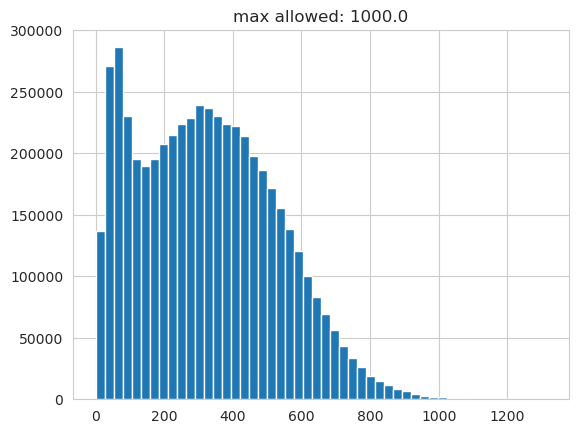

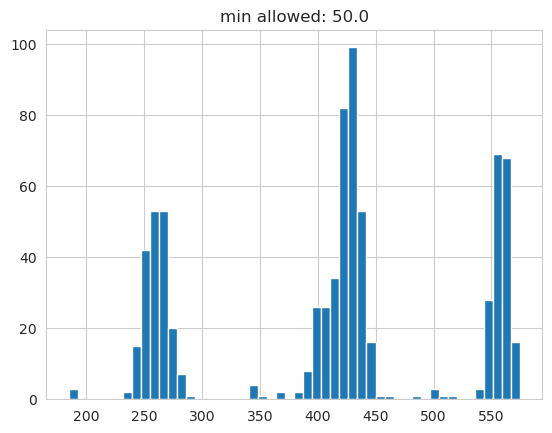

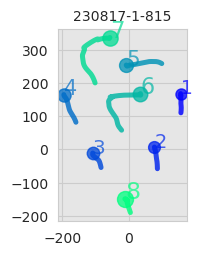

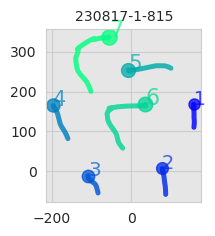

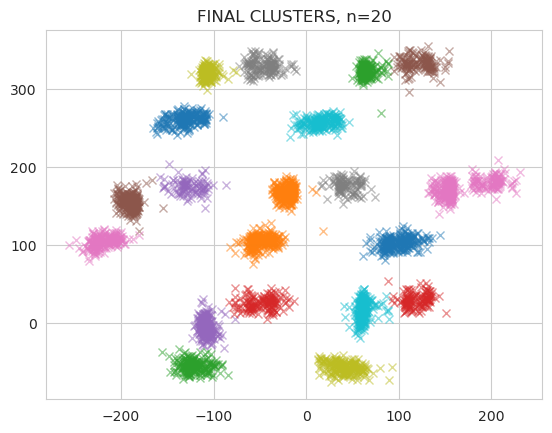

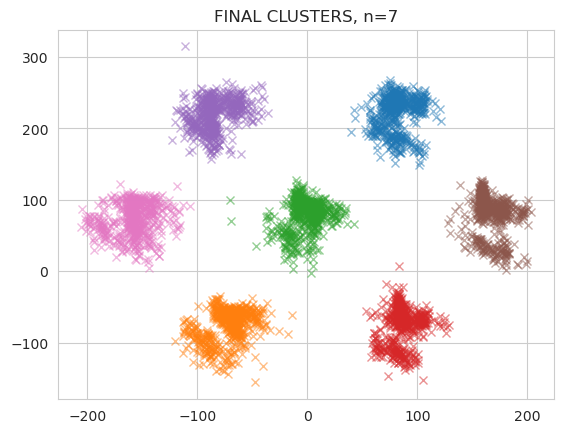

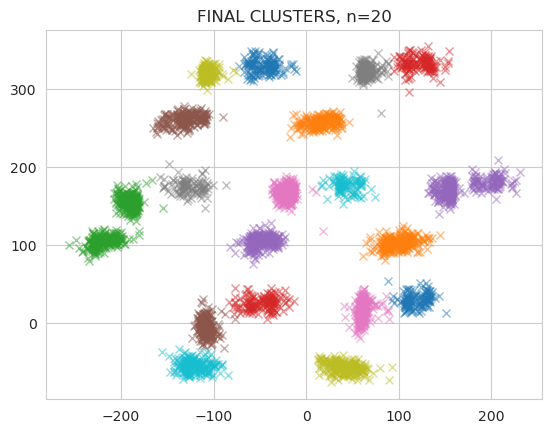

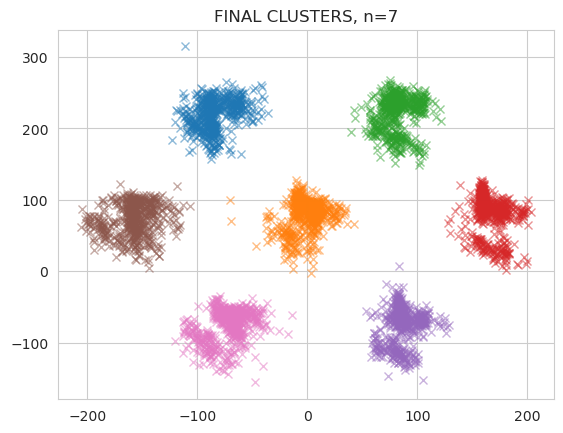

In [3]:
# Char, 
# animal = "Pancho"
# date = 230126
# do_combine = True

# Single prim, novels
# animal = "Pancho"
# date = 230126
animal = "Diego"
date = 230817
# date = 230817
do_combine = False

if do_combine:
    # COMBINE trial and stroke
    dir_suffix = "test"
    question = None
    # q_params = None
    which_level = None
    q_params = {
        "effect_vars": ["seqc_0_shape", "seqc_0_loc"]
    }
    
    combine_trial_and_stroke = True
    
    # PIG
    # question_trial = "PIG_BASE_trial"
    # question_stroke = "PIG_BASE_stroke"
    # check_that_locs_match = True
    
    # CHAR
    question_trial = "CHAR_BASE_trial"
    question_stroke = "CHAR_BASE_stroke"
    check_that_locs_match = True
    check_that_shapes_match = True
else:
    # DONT COMBINE, use questions.
    # question = "CHAR_BASE_stroke"
    # question = "CHAR_BASE_trial"
    # question = "SP_shape_loc"
    question = "PIG_BASE_stroke"
    # question = "PIG_BASE_trial"
    combine_trial_and_stroke = False
    # which_level = "stroke" # Doesnt matter
    which_level = "stroke" # Doesnt matter
    dir_suffix = question

    # Load q_params
    from neuralmonkey.analyses.rsa import rsagood_questions_dict, rsagood_questions_params
    q_params = rsagood_questions_dict(animal, date, question)[question]

############### PARAMS
exclude_bad_areas = True
SPIKES_VERSION = "tdt" # since Snippets not yet extracted for ks
combine_into_larger_areas = False
HACK_RENAME_SHAPES = False
list_time_windows = [(-0.6, 0.6)]
events_keep = None
fr_normalization_method = "across_time_bins"
########################################## RUN

if combine_trial_and_stroke:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_combine_trial_strokes
    DFallpa = dfallpa_extraction_load_wrapper_combine_trial_strokes(animal, date, question_trial,
                                                                       question_stroke,
                                                list_time_windows, events_keep=events_keep,
                                               combine_into_larger_areas = combine_into_larger_areas,
                                               exclude_bad_areas=exclude_bad_areas,
                                                SPIKES_VERSION="tdt",
                                                HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                               fr_normalization_method=fr_normalization_method,
                                                    check_that_shapes_match=check_that_shapes_match,
                                                check_that_locs_match=check_that_locs_match)
else:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
    DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                              which_level=which_level, events_keep=events_keep,
                                              combine_into_larger_areas = combine_into_larger_areas,
                                              exclude_bad_areas = exclude_bad_areas,
                                              SPIKES_VERSION = SPIKES_VERSION,
                                              HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                              fr_normalization_method=fr_normalization_method)

# Code example for benchmarking: decoding shapes

This step takes in a representation of neural data and outputs a scalar score for how well you can decode "shape" from that data

Here, this example is using the raw data (dimensionality = number of channels). The goal is to use methods to reduce the dimensionality of this data, each time running through this decoding benchmark, to compare the different methods

In [4]:
pa = DFallpa["pa"].values[0]

In [6]:
pa.Xlabels["trials"][:2].columns

Index(['task_kind', 'gridloc', 'stroke_index_semantic', 'CTXT_shape_prev',
       'stroke_index_fromlast_tskstks', 'epoch', 'gap_from_prev_angle',
       'probe', 'CTXT_loconclust_next', 'size_this_event',
       'FEAT_num_strokes_beh', 'loc_this_event', 'stroke_index_fromlast',
       'Stroke', 'CTXT_loc_next', 'gap_from_prev_angle_binned', 'character',
       'TokTask', 'aborted', 'origin', 'stroke_index', 'CTXT_loc_prev',
       'gap_to_next_angle_binned', 'FEAT_num_strokes_task', 'loc_off_clust',
       'CTXT_loconclust_prev', 'epoch_orig', 'shape_oriented',
       'stroke_index_is_first', 'CTXT_locoffclust_next', 'loc_on_clust',
       'donepos', 'event_time', 'CTXT_locoffclust_prev',
       'supervision_stage_concise', 'taskgroup', 'shape_this_event',
       'stroke_index_semantic_tskstks', 'CTXT_shape_next', 'shape',
       'index_datapt', 'trialcode', 'gridsize', 'gap_to_next_angle',
       'which_level', 'event', 'bregion', 'twind'],
      dtype='object')

##### First, pull out a specific PA. (just an example)

NOTE: tjhis is just for demonstration. Eventually you will want to loop thru all PA, scoring them all

In [ ]:
from neuralmonkey.classes.population_mult import extract_single_pa


## Make sure to normalize PA before running any modeling on it:

In [ ]:
pa.norm_subtract_mean_each_chan

In [ ]:
pa.norm_subtract_mean_each_chan()

In [ ]:
DFallpa

In [ ]:
True in pa.Chans

In [ ]:
pa.Chans.index(True)

In [ ]:
from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
list_panorm = []
plot_example_chan_number = None
plot_example_split_var_string = None
subtract_mean_at_each_timepoint=False
subtract_mean_across_time_and_trial=True
grouping_vars = None
for pa in DFallpa["pa"].tolist():
    PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, grouping_vars, subtract_mean_each_level_of_var ="IGNORE",
                                            plot_example_chan_number=plot_example_chan_number,
                                            plot_example_split_var_string=plot_example_split_var_string,
                                            DO_AGG_TRIALS=False,
                                            subtract_mean_at_each_timepoint=subtract_mean_at_each_timepoint,
                                            subtract_mean_across_time_and_trial=subtract_mean_across_time_and_trial)
    list_panorm.append(PAnorm)
DFallpa["pa"] = list_panorm

# del DFallpa["pa_norm"]

In [ ]:
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os
SAVEDIR_ANALYSIS = f"{PATH_ANALYSIS_OUTCOMES}/recordings/main/DECODE"

In [ ]:
# Figure out how long is seuqence
n_strokes_max = -1
for i in range(2):
    n_ignore = sum(PAnorm.Xlabels["trials"][f"seqc_{i}_shape"]=="IGNORE")
    n_total = len(PAnorm.Xlabels["trials"][f"seqc_{i}_shape"])
    print(n_ignore, n_total)
    if n_ignore<n_total:
        n_strokes_max=i+1
assert n_strokes_max>0
print(n_strokes_max)

### Keep specific events

In [ ]:
DFallpa["event"].unique()
events_keep = ["03_samp", "04_go_cue"]
DFallpa = DFallpa[DFallpa["event"].isin(events_keep)].reset_index(drop=True)

# PREPROCESS - factorize all relevant labels FIRST here.


In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_vars_conjunctions_extract
dfallpa_preprocess_vars_conjunctions_extract(DFallpa, which_level=which_level)


In [ ]:
dflab = pa.Xlabels["trials"]
sorted([col for col in dflab.columns if "seqc_" in col])

In [ ]:
# Extract all 

In [ ]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

# Sandbox -- distribution of variables

In [ ]:
# Context

var = "CTXT_shapeloc_next"
vars_others = ("CTXT_shapeloc_prev", "shape", "gridloc", "stroke_index_semantic", "task_kind") # important to have SIS, to separate (shapeloc) from END.




In [ ]:
    # var_loc_next = "CTXT_loc_next"
    var_loc_next = "CTXT_locclust_next"
    var_loc_prev = "CTXT_locclust_prev"
    var_loc = "loc_on_clust"

    LIST_VAR = [
        "CTXT_loc_next",
        "CTXT_loc_next",
        "CTXT_loc_next",
        "CTXT_shape_next",
        "CTXT_shape_next",
        "CTXT_shape_next",

        "task_kind",
        "stroke_index",
        "stroke_index_fromlast_tskstks",
        "stroke_index_fromlast_tskstks",
        "FEAT_num_strokes_task",

        "shape",
        "shape",
        # "shape",
        var_loc,
        var_loc,
        var_loc,
    ]
    # More restrictive
    LIST_VARS_OTHERS = [
        ["stroke_index_is_first", "task_kind", var_loc_prev, "shape", var_loc],
        ["stroke_index_is_first", "task_kind", var_loc_prev, "shape", var_loc, "CTXT_shape_next"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", var_loc_prev, "shape", var_loc, "CTXT_shape_next"],
        ["stroke_index_is_first", "task_kind", var_loc_prev, "shape", var_loc],
        ["stroke_index_is_first", "task_kind", var_loc_prev, "shape", var_loc, var_loc_next],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", var_loc_prev, "shape", var_loc, var_loc_next],

        ["stroke_index_is_first", "shape", var_loc, "CTXT_shape_prev", var_loc_prev],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", var_loc_prev, "shape", var_loc],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", var_loc_prev, "shape", var_loc],
        ["stroke_index_is_first", "FEAT_num_strokes_task", "task_kind", "CTXT_shape_prev", var_loc_prev, "shape", var_loc],
        ["stroke_index_is_first", "task_kind", var_loc_prev, "shape", var_loc, "stroke_index"],

        # ["stroke_index_is_first", "task_kind", var_loc, var_loc_prev, var_loc_next],
        ["stroke_index_is_first", "task_kind", var_loc, "CTXT_shape_prev", var_loc_prev],
        ["stroke_index_is_first", "task_kind", var_loc, var_loc_prev],
        # ["stroke_index_is_first", "task_kind", var_loc, "gridloc_within", "CTXT_shape_prev", var_loc_prev],
        ["stroke_index_is_first", "task_kind", "shape", "CTXT_shape_prev", var_loc_prev, var_loc_next],
        ["stroke_index_is_first", "task_kind", "shape", "CTXT_shape_prev", var_loc_prev],
        ["stroke_index_is_first", "task_kind", "shape", var_loc_prev],
        ]

    assert len(LIST_VAR)==len(LIST_VARS_OTHERS)


# 1) Default: Time-resolved decoding

In [ ]:
SAVEDIR_ANALYSIS = "/tmp"
import os

In [ ]:
# List of task kinds
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"]["task_kind"].value_counts()

LIST_TASK_KIND = pa.Xlabels["trials"]["task_kind"].unique().tolist()

In [ ]:
SAVEDIR = f"{SAVEDIR_ANALYSIS}/1_time_resolved"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

n_min_trials = 6

from neuralmonkey.utils.frmat import bin_frmat_in_time
from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_singlevar, decodewrapouterloop_categorical_timeresolved
from pythonlib.tools.plottools import savefig
import pandas as pd
RES = []

# list_vars_decode = ["seqc_0_shape", "seqc_0_loc"]
# list_vars_decode = ["seqc_0_shape"]
list_vars_decode = ["shape_this_event"]
# list_vars_decode = ["seqc_2_shape"]

# list_vars_decode = ["shape_is_novel_all"]

time_bin_size = 0.2
slide = 0.2
max_nsplits = 2

DFRES = decodewrapouterloop_categorical_timeresolved(DFallpa, list_vars_decode, SAVEDIR, time_bin_size, slide, n_min_trials,
                                                     max_nsplits=max_nsplits)
# 
# for i, row in DFallpa.iterrows():
#     br = row["bregion"]
#     tw = row["twind"]
#     ev = row["event"]
#     PA = row["pa"]
#     
#     for task_kind in LIST_TASK_KIND:
#         pa = PA.slice_by_labels("trials", "task_kind", [task_kind])
#     
#         # 2. Extract X from pa
#         X = pa.X # (nchans, ntrials, ntimes)
#         times = pa.Times
#         dflab = pa.Xlabels["trials"]
#     
#         
#         for var_decode in list_vars_decode:
#             print(br, ev, var_decode)
#             
#             # Prune dflab
#             from pythonlib.tools.pandastools import filter_by_min_n
#             dftmp = filter_by_min_n(dflab, var_decode, n_min_trials)
#             
#             if len(dftmp)>0:
#                 indskeep = dftmp["_index"].tolist()
#                 Xthis = X[:, indskeep, :]
#                 dflab_this = dflab.iloc[indskeep]
#                 
#                 if len(dflab_this[var_decode].unique())==1:
#                     print("SKIPPING, becuase only one label:")
#                     print(dflab_this[var_decode].unique())
#                     continue
#         
#                 if len(Xthis)>0:
#                     res = decodewrap_categorical_timeresolved_singlevar(Xthis, times, dflab_this, [var_decode],
#                                                   time_bin_size=time_bin_size, slide=slide, max_nsplits=max_nsplits)
#                     for r in res:
#                         r["event"]=ev
#                         r["bregion"]=br
#                         r["twind"]=tw
#                         r["var_decode"]=var_decode
#                         r["task_kind"] = task_kind
#                     RES.extend(res)
#                 
# DFRES = pd.DataFrame(RES)

# 4) Cross-condition decoding

In [ ]:
# For each time bin, decode shape genearlizing across location

In [ ]:
from neuralmonkey.analyses.decode_good import decode_train_model, decode_categorical_cross_condition,decodewrap_categorical_timeresolved_cross_condition

list_br = DFallpa["bregion"].unique().tolist()
list_tw = DFallpa["twind"].unique().tolist()
list_ev = DFallpa["event"].unique().tolist()




In [ ]:
MAP_LABELS_TO_INT["shape"]

In [ ]:
SAVEDIR = "/tmp"

In [ ]:
MAP_LABELS_TO_INT["loc"]["map_int_to_class"]

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_cross_condition, decodewrapouterloop_categorical_timeresolved_cross_condition

filtdict = None
separate_by_task_kind = True

# PARAMS
# subtract_mean_vars_conj = True # WHether to normalize by sutbracting mean within each level of othervar...


# Context
list_var_decode = [
    "taskconfig_shp_SHSEM",
    "taskconfig_shp_SHSEM",
    "taskconfig_shp_SHSEM",
    "taskconfig_shploc_SHSEM",
    "taskconfig_shploc_SHSEM",
    "taskconfig_shploc_SHSEM",
]
list_vars_conj = [
    ["task_kind"], # minimal control
    ["seqc_0_shape", "seqc_0_center_binned", "task_kind"], # control for first action.
    ["character", "task_kind"], # control for image.
    ["task_kind"], # minimal control
    ["seqc_0_shape", "seqc_0_center_binned", "task_kind"], # control for first action.
    ["character", "task_kind"], # control for image.
    ]

time_bin_size = 0.2
slide = 0.2
subtract_mean_vars_conj = False
DFRES = decodewrapouterloop_categorical_timeresolved_cross_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                     SAVEDIR, time_bin_size=time_bin_size, slide=slide,
                                                     subtract_mean_vars_conj=subtract_mean_vars_conj,
                                                                     filtdict=filtdict,
                                                                     separate_by_task_kind=separate_by_task_kind)



# 2b) Separate decoder for each level of other var (then take average over decoders). Useful to controlling for variables

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_vars_conjunctions_extract
dfallpa_preprocess_vars_conjunctions_extract(DFallpa, which_level)

In [ ]:
# Preprocess for sequence context
SEQ_CONTEXT_MODE = "seq_pred"
            from neuralmonkey.analyses.rsa import rsagood_questions_dict, rsagood_questions_params
            from neuralmonkey.analyses.rsa import preprocess_prune_pa_enough_data, preprocess_rsa_prepare_popanal_wrapper
            
            q_params = rsagood_questions_dict(animal, date, SEQ_CONTEXT_MODE)[SEQ_CONTEXT_MODE]
            # q_params["effect_vars"] = ["shape_this_event", "loc_this_event", "stroke_index_fromlast_tskstks"]         
            # q_params["effect_vars"] = ["shape_this_event", "loc_this_event", "stroke_index"]         
            q_params["effect_vars"] = [var_decode] + vars_conj_condition         
            
            # q_params["exclude_first_stroke"] = False
            pa, res_check_tasksets, res_check_effectvars = preprocess_rsa_prepare_popanal_wrapper(pa, **q_params)


In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_timeresolved_within_condition

In [ ]:
SAVEDIR = "/tmp"

In [ ]:
# Variable --> shape config
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]
dflab[:10]

In [ ]:
# PARAMS

separate_by_task_kind = True

# Context
# Context
list_var_decode = [
    "seqc_0_shape",
    "seqc_0_shape",
    "seqc_0_shapesemcat",
    "seqc_0_locon_binned",
]
list_vars_conj = [
    ["seqc_0_center_binned", "gridsize", "task_kind"],
    ["taskconfig_shp_SHSEM", "seqc_0_center_binned", "task_kind"], # control for parse
    ["seqc_0_center_binned", "gridsize", "task_kind"],
    ["seqc_0_shape", "gridsize", "task_kind"],
    ]
# filtdict = {
#     "stroke_index":[0,3,4,5,6,7,8],
# }
# TRy with and without this.
filtdict = None


# RUns
max_nsplits = 2
time_bin_size = 0.2
slide = 0.2

# filtdict = {
#     "stroke_index":[0,1, 23,4,5,6,7,8],
# }
# filtdict = None

# PARAMS
DFRES = decodewrapouterloop_categorical_timeresolved_within_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                    SAVEDIR, time_bin_size=time_bin_size, slide=slide, filtdict=filtdict,
                                                                      separate_by_task_kind=separate_by_task_kind)


In [ ]:
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars
prune_min_n_trials = 5
prune_min_n_levs = 2
plot_counts_heatmap_savepath = "/tmp/tmp.png"
balance_no_missed_conjunctions = False
extract_with_levels_of_conjunction_vars(dflab, list_var_decode[0], list_vars_conj[0],
                                                                 n_min_across_all_levs_var=prune_min_n_trials,
                                                                 lenient_allow_data_if_has_n_levels=prune_min_n_levs,
                                                                 prune_levels_with_low_n=True,
                                                                 ignore_values_called_ignore=True,
                                                                 plot_counts_heatmap_savepath=plot_counts_heatmap_savepath,
                                                                 balance_no_missed_conjunctions=balance_no_missed_conjunctions)


# 3) Train a single decoder on specific dataset, then test across all time

In [ ]:
# HACK - combine all bregions into single pa
if False:
    from neuralmonkey.classes.population import concatenate_popanals_flexible
    list_wl = DFallpa["which_level"].unique().tolist()
    resthis = []
    for wl in list_wl:
        for ev in list_ev:
            for tw in list_tw:
                a = DFallpa["event"] == ev
                b = DFallpa["twind"] == tw
                c = DFallpa["which_level"] == wl
                dfthis = DFallpa[a & b]
                pa = concatenate_popanals_flexible(dfthis["pa"].tolist(), "chans")[0]
                resthis.append({
                    "which_level":wl,
                    "event":ev,
                    "bregion":"ALL",
                    "twind":tw,
                    "pa":pa
                })
    DFallpa_ALL = pd.DataFrame(resthis)
    DFallpa_ALL

In [ ]:
trials_train = pa.Xlabels["trials"][pa.Xlabels["trials"]["task_kind"]=="prims_single"].index.tolist()
trials_test = pa.Xlabels["trials"][pa.Xlabels["trials"]["task_kind"]=="prims_on_grid"].index.tolist()
ntrials_expected_assert = len(pa.Xlabels["trials"])

In [ ]:
HACK = False
if HACK:
    # Use all brain regions
    DFallpaTHIS = DFallpa_ALL
else:
    DFallpaTHIS = DFallpa

from neuralmonkey.analyses.decode_good import decodewrap_categorical_single_decoder_across_time
list_br = DFallpaTHIS["bregion"].unique().tolist()
list_tw = DFallpaTHIS["twind"].unique().tolist()
# list_var_decode = ["seqc_0_shape", "seqc_0_loc"]
list_var_decode = ["seqc_0_shape"]
# ev_train = "03_samp"
# twind_train = [0.4, 0.6]
ev_train = "06_on_strokeidx_0"
twind_train = [0.05, 0.35]

ev_test = "03_samp"
# ev_test = "06_on_strokeidx_0"
time_bin_size=0.05
slide=0.025


In [ ]:
RES = []
for br in list_br:
    for tw in list_tw:
        # 1. Extract the specific pa for this (br, tw)
        
        # Prep train and test PA
        PA_train = extract_single_pa(DFallpaTHIS, br, tw, event=ev_train)
        PA_train = PA_train.slice_by_dim_values_wrapper("trials", trials_train)
        PA_train = PA_train.slice_by_dim_values_wrapper("times", twind_train)
        PA_train = PA_train.agg_wrapper("times")
        x_train = PA_train.X.squeeze(axis=2).T # (ntrials, nchans)
        
        PA_test = extract_single_pa(DFallpaTHIS, br, tw, event=ev_test)
        PA_test = PA_test.slice_by_dim_values_wrapper("trials", trials_test)
        if time_bin_size is not None:
            PA_test = PA_test.agg_by_time_windows_binned(time_bin_size, slide)
        X_test = PA_test.X # (chans, trials, times)
        times_test = PA_test.Times
        
        for var_decode in list_var_decode:

            # Train model
            labels_train = PA_train.Xlabels["trials"][var_decode].tolist()
            
            # Get test data
            labels_test = PA_test.Xlabels["trials"][var_decode].tolist()
            
            res = decodewrap_categorical_single_decoder_across_time(x_train, labels_train, X_test, labels_test,
                                                                  times_test, do_std=False)
        
            for r in res:
                r["var_decode"]=var_decode
                r["bregion"]=br
                r["twind"]=tw   
                r["event"] = ev_test

            RES.extend(res)

DFRES = pd.DataFrame(RES)
 

### Extract single trial results

In [ ]:

# PARAMS
var_decode = "seqc_0_shape"
bregion = "PMv"
twind = (-0.4, 0.6)

In [ ]:

a = DFRES["var_decode"]==var_decode
b = DFRES["bregion"]==bregion
c = DFRES["twind"]==twind
dfthis = DFRES[a & b & c]

times = dfthis["time"]
import numpy as np
labels_predicted = np.stack(dfthis["labels_predicted"]).T # (ntrials, ntimes)
labels_test = np.stack(dfthis["labels_test"]).T
conf_scores = np.transpose(np.stack(dfthis["conf_scores"]), [1,0,2]) # (ntrials, ntimes, nclasses)

# score each time bin as correct or incorrect
labels_correct = (labels_predicted == labels_test).astype(int)


In [ ]:
# For each trial, what was its label
assert np.all(np.diff(labels_test, axis=1))==0, "otherwise cant do next step."
labels_each_trial = labels_test[:,0]
labels_orig = PA_test.Xlabels["trials"][var_decode].tolist()
assert len(labels_orig)==len(labels_each_trial)

map_labint_to_trials = {}
map_labint_to_laborig = {}
labels_unique = np.unique(labels_each_trial)
for lab in labels_unique:
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT
    map_labint_to_trials[lab] = inds_this_label

    # Map it back to original label
    lab_orig = PA_test.Xlabels["trials"][var_decode][inds_this_label].unique()
    assert len(lab_orig)==1
    map_labint_to_laborig[lab] = lab_orig[0]

map_trial_to_labint = {i:labint for i, labint in enumerate(labels_each_trial)}
print(map_labint_to_laborig)    
map_laborig_to_labint = {}
for labint, laborig in map_labint_to_laborig.items():
    assert laborig not in map_laborig_to_labint
    map_laborig_to_labint[laborig] = labint

import matplotlib.pyplot as plt
from pythonlib.tools.plottools import makeColors
pcols = makeColors(len(map_labint_to_laborig))
map_trial_to_seq = {}
map_trial_to_seq_ints = {}
for i, seq in enumerate(PA_test.Xlabels["trials"].loc[:, ["seqc_0_shape", "seqc_1_shape"]].values.tolist()):
    map_trial_to_seq[i] = (tuple(seq))
    map_trial_to_seq_ints[i] = [map_laborig_to_labint[s] if s in map_laborig_to_labint else s for s in seq]


In [ ]:
# Pick n random trials
import random
n=  9
trials_all = list(range(len(map_trial_to_labint)))
trials = random.sample(trials_all, n)
ncols = 3
nrows = int(np.ceil(len(trials)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), sharex=True, sharey=True)

for tr, ax in zip(trials, axes.flatten()):
    
    # ax = axes.flatten()[0]
    lab_pred = labels_predicted[tr,:]
    # lab_corr = labels_correct[trial,:]
    # lab_test = labels_test[trial,:]
    # ax.plot(times, lab_pred, "-ok"),
    # ax.plot(times, lab_test, "-r")
    
    # for each class, plot its time series
    for labint in map_labint_to_laborig:
        cs_this_lab = conf_scores[tr, :, labint].squeeze()
        
        ax.plot(times, cs_this_lab, label=labint, color=pcols[labint])
        # ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "-", color=pcols[labint], linewidth=4)
        ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "s", color=pcols[labint])
    
    ax.axvline(0, color="k", alpha=0.5)
    ax.set_title(f"{var_decode}={map_trial_to_labint[tr]}", color=pcols[map_trial_to_labint[tr]])
    ax.set_xlabel(f"seq: {map_trial_to_seq_ints[tr]}")
    ax.legend()
        

In [ ]:
# For each class label, collect all trials for which that is the correct label, and overlap

labels_unique = np.unique(labels_each_trial)
ncols = 3
nrows = int(np.ceil(len(labels_unique)/ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

for lab, ax in zip(labels_unique, axes.flatten()):
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT 
    ax.plot(times, labels_predicted[inds_this_label, :].T, "-ok", alpha=0.05)
    ax.set_title(lab)
    
    

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

ax = axes.flatten()[0]
ax.plot(times, labels_correct.T, "xk", alpha=0.003);

In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")



# 4) Cross-decoding across time bins

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_cross_time

In [ ]:
SAVEDIR_ANALYSIS = "/tmp"
import os

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrap_categorical_cross_time

SAVEDIR = f"{SAVEDIR_ANALYSIS}/3_cross_temporal"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)


##### A variation, where instead of first concatting PAs, just compute decode separately (and across PA) and then concatenate to plot
Advantage: dont have to have identical trials, which is needed if you want to concat breigons

In [ ]:

assert False, "add methdo to subtract mean in other window..."

In [ ]:
DFallpa

In [ ]:
DFallpa_TEST = DFallpa[:20]

In [ ]:
list_var_decode

In [ ]:

from neuralmonkey.analyses.decode_good import preprocess_extract_X_and_labels
from neuralmonkey.analyses.decode_good import decodewrap_categorical_cross_time, decodewrapouterloop_categorical_cross_time_plot

SAVEDIR = f"{SAVEDIR_ANALYSIS}/3_cross_temporal"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

# Make sure all pa use the same variables to refer to shapes.
import warnings
warnings.filterwarnings("default")
# warnings.filterwarnings("error")
time_bin_size = 0.3
slide=0.3

list_vars_decode = ["seqc_0_shape"]
list_ev = ['04_go_cue', '06_on_STK_1']

assert len(DFallpa["twind"].unique())==1, "not big deal. just change code below to iter over all (ev, tw)."

from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_cross_time
DFRES = decodewrapouterloop_categorical_cross_time(DFallpa_TEST, list_var_decode, time_bin_size, slide)


In [ ]:
from neuralmonkey.analyses.decode_good import decodewrap_categorical_cross_time, decodewrapouterloop_categorical_cross_time_plot
decodewrapouterloop_categorical_cross_time_plot(DFRES, SAVEDIR)

##### Variation, focusing on "shape_this_event"

In [ ]:
list_var_decode = ["shape_this_event"]
time_bin_size = 0.2
slide = 0.2
DFRES = decodewrapouterloop_categorical_cross_time(DFallpa, list_var_decode, time_bin_size, slide, savedir_ndata="/tmp")


In [ ]:
DFRES[:2]

In [ ]:
for var in ["event_train", "event_test", "task_kind_train", "task_kind_test"]:
    print(DFRES[var].unique())


In [ ]:
import numpy as np
inds = list(range(100000))


In [ ]:
%%timeit
np.all(np.diff(inds)==1)

In [ ]:
%%timeit
(list(sorted(set(inds)))==inds) and (inds[-1] == len(inds)-1)



In [ ]:
%%timeit
(list(sorted(set(inds)))==inds) and (inds[-1] == len(inds)-1)



In [ ]:
%%timeit
all([i2-i1==1 for i1, i2 in zip(inds[:-1], inds[1:])])

##### New plots, which compare decoding across-context vs. within-context, etc.

In [ ]:
DFRESTHIS = DFRES[DFRES["bregion"].isin(["M1_m", "PM_v"])].reset_index(drop=True)

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_cross_time_plot_compare_contexts

var_decode = "shape_this_event"
SAVEDIR = "/tmp"
decodewrapouterloop_categorical_cross_time_plot_compare_contexts(DFRESTHIS, var_decode,
                                                                     SAVEDIR)


##### For a given decoder, plot its predictions during a given event [OBSOLETE< see #5 below)

In [ ]:


bregion = "PMv"

var_decode = "seqc_0_shape"
event_train = "04_go_cue"
tbin_train = 1
event_test = "06_on_STK_1"
tbin_test = 1

# var_decode = "seqc_0_shape"
# event_train = "04_go_cue"
# tbin_train = 1
# event_test = "06_on_STK_0"
# tbin_test = 1
# 
# var_decode = "seqc_0_shape"
# event_train = "06_on_STK_0"
# tbin_train = 2
# event_test = "04_go_cue"
# tbin_test = 1

a = DFRES["bregion"] == bregion
b = DFRES["var_decode"] == var_decode
c = DFRES["event_train"] == event_train
d = DFRES["tbin_train"] == tbin_train
e = DFRES["event_test"] == event_test
f = DFRES["tbin_test"] == tbin_test

tmp = DFRES[a & b & c & d & e & f]
assert len(tmp)==1

# Labels (convert label ints to actual value)
labels_pred = tmp["labels_predicted"].values[0]
map_int_to_lab = tmp["map_int_to_lab"].values[0]
labels_pred = [map_int_to_lab[i] for i in labels_pred]

score = tmp["score"].values[0]

# For each trial, compare to its sequence context
inds_keep_test = tmp["inds_keep_test"].values[0]


In [ ]:
pa_test = extract_single_pa(DFallpa, bregion, twind, "trial", event=event_test)
dflab_test = pa_test.Xlabels["trials"].iloc[inds_keep_test].copy()


list_seq = dflab_test.loc[:, ["seqc_0_shape", "seqc_1_shape"]].values.tolist() # list of n-tuples (len of seq)


In [ ]:
dflab_test["labels_pred"] = labels_pred
dflab_test[:5]



In [ ]:
sns.displot(data=dflab_test, x="labels_pred", row="seqc_0_shape", col="seqc_1_shape", height=5)


In [ ]:
# Sumamraize:

# frequency of prediction matching first shape
# same, for second shape.


# 5) Cross-temporal decoder, but with decoder trained using one variable (e.g., seqc_0_shape) and testing prediction of another variable (e.g., seqc_1_shape).
Useful if, for example, want to see if decoder trained during visual presentation can decode 2nd stroke DURING 1st stroke.

In [ ]:
list(range(1,3))

In [ ]:
SAVEDIR = f"{SAVEDIR_ANALYSIS}/4_cross_temporal_diff_var_train_test"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)


In [ ]:
DFallpa["event"].value_counts()

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrap_categorical_cross_time, decodewrapouterloop_categorical_cross_time_cross_var

In [ ]:
A = sorted(set(DFRES["var_decode_train"].tolist()))
B = sorted(set(DFRES["var_decode_test"].tolist()))
list_var_decode_train_test = [(a, b) for a in A for b in B]
list_var_decode_train_test


In [ ]:
# Make sure all pa use the same variables to refer to shapes.
import warnings
warnings.filterwarnings("default")
# warnings.filterwarnings("error")

# list_var_decode_train_test = [
#     ["seqc_0_shape", "seqc_1_shape"], # (variable to construct decoder, variable that you will try to predict).
#     ["seqc_0_shape", "seqc_2_shape"], # (variable to construct decoder, variable that you will try to predict).
#     ["seqc_1_shape", "seqc_2_shape"] # (variable to construct decoder, variable that you will try to predict).
# ]
list_var_decode_train_test = [
    ["seqc_0_shape", "seqc_1_shape"], # (variable to construct decoder, variable that you will try to predict).
]

labels_ignore = ["IGNORE", ("IGNORE",)]
# list_ev = ['04_go_cue', '06_on_STK_0', '06_on_STK_1', '06_on_STK_2']
list_ev = ['04_go_cue', '06_on_STK_0']

assert len(DFallpa["twind"].unique())==1, "not big deal. just change code below to iter over all (ev, tw)."

SAVEDIR = f"{SAVEDIR_ANALYSIS}/4_cross_temporal_diff_var_train_test"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

from neuralmonkey.analyses.decode_good import decodewrap_categorical_cross_time

# Make sure all pa use the same variables to refer to shapes.
time_bin_size = 0.3
slide=0.3


DFRES = decodewrapouterloop_categorical_cross_time_cross_var(DFallpa,
                                                     list_var_decode_train_test,
                                                         time_bin_size, slide)
from neuralmonkey.analyses.decode_good import decodewrap_categorical_cross_time, decodewrapouterloop_categorical_cross_time_plot
decodewrapouterloop_categorical_cross_time_plot(DFRES, SAVEDIR)

# 
# assert len(DFallpa["twind"].unique())==1, "not big deal. just change code below to iter over all (ev, tw)."
# 
# RES = []
# for br in list_br:
#     for tw in list_tw:
#         for ev_train in list_ev:
#             for ev_test in list_ev:
# 
#                 print(br, tw, ev_train, ev_test)
# 
#                 # TRAIN
#                 PA_train = extract_single_pa(DFallpa, br, tw, event=ev_train)
#                 if time_bin_size is not None:
#                     PA_train = PA_train.agg_by_time_windows_binned(time_bin_size, slide)
# 
#                 # TEST
#                 PA_test = extract_single_pa(DFallpa, br, tw, event=ev_test)
#                 if time_bin_size is not None:
#                     PA_test = PA_test.agg_by_time_windows_binned(time_bin_size, slide)
# 
#                 for var_decode_train, var_decode_test in list_var_decode_train_test:
# 
#                     X_train, labels_train, times_train = preprocess_extract_X_and_labels(PA_train, var_decode_train)
#                     X_test, labels_test, times_test = preprocess_extract_X_and_labels(PA_test, var_decode_test)
# 
#                     if len(set(labels_train))==1 or len(set(labels_test))==1:
#                         print("SKIPPING, becuase only one label:")
#                         print("Train:", set(labels_train))
#                         print("Test:", set(labels_test))
#                         continue
# 
#                     # Only do splits if these are same trials
#                     do_train_test_kfold_splits = labels_train==labels_test
# 
#                     res = decodewrap_categorical_cross_time(X_train, labels_train, times_train,
#                                                       X_test, labels_test, times_test,
#                                                       do_std=False, labels_ignore=labels_ignore,
#                                                             do_train_test_kfold_splits=do_train_test_kfold_splits)
# 
#                     for r in res:
#                         r["var_decode_train"]=var_decode_train
#                         r["var_decode_test"]=var_decode_test
#                         r["bregion"]=br
#                         r["event_train"]=ev_train
#                         r["event_test"]=ev_test
# 
#                     RES.extend(res)
# DFRES = pd.DataFrame(RES)

# LOAD a pre-saved results from decoding

In [ ]:
import pickle
from pythonlib.tools.pandastools import grouping_print_n_samples
import numpy as np
import pandas as pd
from pythonlib.tools.pandastools import applyFunctionToAllRows
from pythonlib.tools.pandastools import append_col_with_grp_index
import os
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
from pythonlib.tools.plottools import savefig
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Pancho
# TIME_TRAIN_REL_TEST = 0.075
# TIME_WIND_TEST_REL_EVENT = [-0.3, 0.3]

# TIME_TRAIN_REL_TEST = 0.175
# TIME_WIND_TEST_REL_EVENT = [-0.3, 0.4]

# TIME_TRAIN_REL_TEST = 0.225
# TIME_WIND_TEST_REL_EVENT = [-0.6, 0.6]



In [ ]:
# animal = "Pancho"
# date = 230126

N_STROKES_MAX = 4
for animal, date, question in [
    ("Pancho", 230623, "PIG"),
    ("Diego", 230628, "PIG"),
    ("Pancho", 230626, "PIG"),
    ("Diego", 230630, "PIG"),
    ("Pancho", 230126, "CHAR"),
    ("Diego", 231201, "CHAR"),
    ("Diego", 231204, "CHAR"),
    ("Diego", 231219, "CHAR"),
]:
    # animal = "Diego"
    # date = 231219
    # question = "CHAR"
    combined_trial_stroke = 1
    combine_areas = False
    which_decode = "3_cross_temporal"
    
    ############################## LOAD DATA
    SAVEDIR_LOAD = f"/gorilla1/analyses/recordings/main/DECODE/{animal}-{date}/{question}-combined_{combined_trial_stroke}-combine_areas_{combine_areas}" 
    # SAVEDIR = f"/gorilla1/analyses/recordings/main/DECODE/{animal}-{date}/{question}-combined_{combined_trial_stroke}-combine_areas_{combine_areas}/{which_decode}"
    path = f"{SAVEDIR_LOAD}/{which_decode}/DFRES.pkl"
    print(SAVEDIR_LOAD)
    
    DFRES = pd.read_pickle(path)    
    
    ############################# PREP DATAFRAME
    ##### Context (same, diff) plots, binning tbins --> scalar
    # Give new column that classifies the "context" 
    def F(x):
        # If is not strokes, then ignore it (throw out)
        if "06_on_" not in x["event_train"]:
            return "IGNORE"
            
        # Classify context
        tktrain, tktest, evtrain, evtest = x["task_kind_train"], x["task_kind_test"], x["event_train"], x["event_test"]
        if tktrain==tktest and evtrain==evtest:
            return "same"
        elif (tktrain==tktest) and (not evtrain==evtest):
            return "same_tk_diff_ev"
        elif (not tktrain==tktest) and (evtrain==evtest):
            return "diff_tk_same_ev"
        else:
            return "diff_tk_diff_ev"    
    DFRES = applyFunctionToAllRows(DFRES, F, "context_tk_ev")
    
    # Also group all "diff" into a single "diff"
    inds = DFRES["context_tk_ev"].isin(["same_tk_diff_ev", "diff_tk_same_ev", "diff_tk_diff_ev"])
    DFRES["context_tk_ev_simple"] = DFRES["context_tk_ev"]
    DFRES.loc[inds, "context_tk_ev_simple"] = "diff"
        
    # Only call "diff" those cases that are diff task kind... (avoid confounds in correlations across stroke indices, for same task kind).
    inds = DFRES["context_tk_ev"].isin(["diff_tk_same_ev", "diff_tk_diff_ev"])
    DFRES["context_tk_ev_simple_diff_tk"] = DFRES["context_tk_ev"]
    DFRES.loc[inds, "context_tk_ev_simple_diff_tk"] = "diff"
    
    # Append column with the test "event x "task kind". 
    DFRES = append_col_with_grp_index(DFRES, ["task_kind_test", "event_test"], "tk_ev_test", strings_compact=True)
    DFRES = append_col_with_grp_index(DFRES, ["task_kind_train", "event_train"], "tk_ev_train", strings_compact=True)
    
    grouping_print_n_samples(DFRES, ["context_tk_ev_simple", "context_tk_ev", "task_kind_train", "task_kind_test", "event_train", "event_test"]);
    
    # for TIME_TRAIN_REL_TEST in [0.125, 0.175, 0.225]:
    for TIME_TRAIN_REL_TEST in [0.175]:
        for TIME_WIND_TEST_REL_EVENT in [
                                    # [-0.5, 0.5],
                                    # [-0.3, 0.4],
                                    [-0.4, -0.025],
                                    [0.025, 0.4],
                                ]:
            #             TIME_TRAIN_REL_TEST = 0.175
            # TIME_WIND_TEST_REL_EVENT = [-0.3, 0.4]
    
            ##### Convert to scalar by taking mean over time bins
            # criterion for time bins
            def F(x):
                # relative time
                a = np.abs(x["time_train"] - x["time_test"]) < TIME_TRAIN_REL_TEST
                # absolute time
                b = (x["time_test"] >= TIME_WIND_TEST_REL_EVENT[0]) & (x["time_test"] <= TIME_WIND_TEST_REL_EVENT[1])
                return a & b
            DFRES = applyFunctionToAllRows(DFRES, F, "keep_tbin")
        
            # Print results
            if False:
                grouping_print_n_samples(DFRES, ["keep_tbin", "time_train", "time_test"])
            
            for INCLUDE_PIG in [True, False]:
                for EXCLUDE_FIRST_STROKE in [True, False]:
                    
                    ####################### PRUNE DATA TO JUST TIME BINS OF INTEREST
                    DFRES_THIS = DFRES.copy()
                    
                    print(len(DFRES))
                    # Prune to just those with tbins to keep
                    DFRES_THIS = DFRES_THIS[DFRES_THIS["keep_tbin"]==True]
                    print(len(DFRES_THIS))
                    
                    # Remove those with CONTEXT ignore.
                    DFRES_THIS = DFRES_THIS[DFRES_THIS["context_tk_ev"] != "IGNORE"]
                    print(len(DFRES_THIS))
                    
                    if INCLUDE_PIG==False:
                        # Only include data that is single prims or character (since PIG is low N).
                        DFRES_THIS = DFRES_THIS[(DFRES_THIS["task_kind_train"].isin(["prims_single", "character"])) & (DFRES_THIS["task_kind_test"].isin(["prims_single", "character"]))]
                    
                    # Remove cases that are the high N stroke nums, they are usualyl noise
                    events_keep = [f"06_on_STK_{i}" for i in range(N_STROKES_MAX)]
                    print(len(DFRES_THIS))
                    DFRES_THIS = DFRES_THIS[(DFRES_THIS["event_train"].isin(events_keep)) & (DFRES_THIS["event_test"].isin(events_keep))]
                    print(len(DFRES_THIS))
                    
                    if EXCLUDE_FIRST_STROKE:
                        DFRES_THIS = DFRES_THIS[~(DFRES_THIS["event_train"]=="06_on_STK_0") & ~(DFRES_THIS["event_test"]=="06_on_STK_0")]
                    
                    #################################### Aggregate to average over time bins
                    from pythonlib.tools.pandastools import aggregGeneral
                    DFRES_THIS = aggregGeneral(DFRES_THIS, ["var_decode", "bregion", "event_train", "event_test", "task_kind_train", "task_kind_test", 
                                                            "context_tk_ev", "context_tk_ev_simple", "context_tk_ev_simple_diff_tk",
                                                            "keep_tbin", "tk_ev_test", "tk_ev_train"], values=["score", "score_adjusted"])
                    
                    DFRES_THIS = DFRES_THIS.reset_index(drop=True)
                    
                    #################################### PLOTS
                    a = TIME_TRAIN_REL_TEST
                    b = "_".join([str(x) for x in TIME_WIND_TEST_REL_EVENT])
                    savedir = f"{SAVEDIR_LOAD}/3_cross_temporal_split_by_contexts_scalar/inclPIG={INCLUDE_PIG}-excldFrstStk={EXCLUDE_FIRST_STROKE}-TRelTest={a}-TWindRelEv={b}"
            
                    os.makedirs(savedir, exist_ok=True)
                    
                    if "diff" in DFRES_THIS["context_tk_ev_simple"].tolist():
                        # Sometimes pruning leads to loss of all data...
                        
                        dfthis = DFRES[DFRES["bregion"]==DFRES["bregion"].values[0]] # pick out a subsample --> smaler plots.
                        fig = sns.relplot(data=dfthis, x="time_train", y="time_test", col="keep_tbin")
                        savefig(fig, f"{savedir}/time_bins.pdf")
                        
                        for ctxt_diff in ["same_tk_diff_ev", "diff_tk_same_ev", "diff_tk_diff_ev"]:
                            if ctxt_diff in DFRES_THIS["context_tk_ev"].tolist():
                                _, fig = plot_45scatter_means_flexible_grouping(DFRES_THIS, var_manip="context_tk_ev", x_lev_manip="same", y_lev_manip=ctxt_diff, var_subplot="var_decode", var_value="score_adjusted", var_datapt="bregion")
                                savefig(fig, f"{savedir}/scatter-same-vs-{ctxt_diff}.pdf")
                                plt.close("all")
                        
                        # just "same" vs "diff" (combining all diff).
                        _, fig = plot_45scatter_means_flexible_grouping(DFRES_THIS, var_manip="context_tk_ev_simple", x_lev_manip="same", y_lev_manip="diff", var_subplot="var_decode", var_value="score_adjusted", var_datapt="bregion")
                        savefig(fig, f"{savedir}/scatter-same-vs-diff.pdf")
                        plt.close("all")
                        
                        if "diff" in DFRES_THIS["context_tk_ev_simple_diff_tk"].tolist():
                            _, fig = plot_45scatter_means_flexible_grouping(DFRES_THIS, var_manip="context_tk_ev_simple_diff_tk", x_lev_manip="same", y_lev_manip="diff", var_subplot="var_decode", var_value="score_adjusted", var_datapt="bregion")
                            savefig(fig, f"{savedir}/scatter-same-vs-diff_task_kind.pdf")
                            plt.close("all")
                        
                        # Separate subplot for each bregion.
                        for var_datapt in ["tk_ev_train", "tk_ev_test"]:
                            _, fig = plot_45scatter_means_flexible_grouping(DFRES_THIS, var_manip="context_tk_ev_simple", x_lev_manip="same", y_lev_manip="diff",    var_subplot="bregion", var_value="score_adjusted", var_datapt=var_datapt, plot_error_bars = False, shareaxes=True)
                            savefig(fig, f"{savedir}/scatter_by_bregion-same-vs-diff-datapt={var_datapt}.pdf")
                                                
                            plt.close("all")

# [TESTING] State space plots (tsne)
NOTE: previously have dPCA plots...

# NEW MODULATION SCORE EUCLIDIAN

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_vars_conjunctions_extract
dfallpa_preprocess_vars_conjunctions_extract(DFallpa, which_level=which_level)


In [ ]:
SAVEDIR_ANALYSIS = "/tmp"
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
########################################
SHUFFLE = False

# LIST_VAR = [
#     # "CTXT_loc_next",
#     "CTXT_shape_next",
#     # "task_kind",
#     # "stroke_index",
#     # "FEAT_num_strokes_task",
#     "shape",
# ]
# # More restrictive
# LIST_VARS_OTHERS = [
#     # ["task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc", "CTXT_shape_next"],
#     ["task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"],
#     # ["shape", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev"],
#     # ["task_kind", "FEAT_num_strokes_task", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc"],
#     # ["CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc"],
#     ["task_kind", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev"],
#     ]

LIST_VAR = [
    "CTXT_shape_next",
    "shape",
]
# More restrictive
LIST_VARS_OTHERS = [
    ["task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"],
    ["task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"],
    ["task_kind", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev"],
    ]

PLOT = False
PLOT_MASKS = False
nmin_trials_per_lev = 6
PLOT_STATE_SPACE = False
twind = (-0.2, 0.2)
tbin_dur = 0.1
tbin_slice = tbin_dur

from neuralmonkey.analyses.decode_good import euclidian_distance_compute

list_dfres = []
for i, row in DFallpa.iterrows():
    br = row["bregion"]
    tw = row["twind"]
    ev = row["event"]
    PA = row["pa"]

    print(br)
    savedir = f"{SAVEDIR_ANALYSIS}/{br}"
    os.makedirs(savedir, exist_ok=True)
    dfres = euclidian_distance_compute(PA, LIST_VAR, LIST_VARS_OTHERS, PLOT, PLOT_MASKS,
                               twind, tbin_dur, tbin_slice, savedir, PLOT_STATE_SPACE=PLOT_STATE_SPACE,
                                       nmin_trials_per_lev=nmin_trials_per_lev)
    plt.close("all")
    if len(dfres)>0:
        dfres["bregion"] = br
        dfres["twind"] = [tw for _ in range(len(dfres))]
        dfres["event"] = ev

        list_dfres.append(dfres)

In [ ]:
DFRES = pd.concat(list_dfres).reset_index(drop=True)

# Compute normalized distnaces
DFRES["dist_norm_95"] = DFRES["dist"]/DFRES["DIST_NULL_95"]
DFRES["dist_norm_50"] = DFRES["dist"]/DFRES["DIST_NULL_50"]

DFRES["var_others"] = [tuple(x) for x in DFRES["var_others"]]
from pythonlib.tools.pandastools import append_col_with_grp_index
DFRES = append_col_with_grp_index(DFRES, ["var", "var_others"], "var_var_others")


In [ ]:
DFRES[:10]

In [ ]:
# Normalize by same
dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF, dfpivot = summarize_featurediff(DFRES, "effect_samediff", ["diff", "same_pt_pairs"], ["dist_norm_95"], ["var_var_others", "var", "var_others", "levo", "bregion", "twind", "event"], return_dfpivot=True)

dfpivot["diff_minus_same"] = dfpivot["dist_norm_95"]["diff"]/(dfpivot["dist_norm_95"]["diff"] + dfpivot["dist_norm_95"]["same_pt_pairs"])
dfpivot["diff_divide_same"] = dfpivot["dist_norm_95"]["diff"]/dfpivot["dist_norm_95"]["same_pt_pairs"]


In [ ]:
dfpivot

##### If using "euclidian", then need to subtract shuffled

In [ ]:
from pythonlib.tools.pandastools import summarize_featurediff

dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF = summarize_featurediff(DFRES, "shuffled", [True, False], ["dist_norm_95"], ["var_var_others", "var", "var_others", "levo", "bregion", "twind", "event"], return_dfpivot=False)

# summarize_featurediff(DFRES, "bregion", ["M1_m", "M1_l"], ["DIST_NULL_95"], ["var", "var_others"], return_dfpivot=True)


# dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF = summarize_featurediff(DFRES, "bregion", ["M1_m", "M1_l"], ["DIST_NULL_95"], ["var", "var_others", "levo", "twind", "event"], return_dfpivot=False)


# DFRES[DFRES["shuffled"].isna()==True].index
# DFRES.loc[DFRES["shuffled"].isna(), ["shuffled"]] = False
# # DFRES.loc[DFRES[DFRES["shuffled"].isna()==True].index, ["shuffled"]]

# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig

fig = sns.catplot(data=dfsummaryflat, x="bregion", y="value", col="var_var_others", hue="variable", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

# fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3,  aspect=1.5, kind="bar", ci=68)
# rotateLabel(fig)
# savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_bar.pdf")


# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="shuffled", col_wrap=3,  aspect=1.5, kind="bar", ci=68)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_bar.pdf")


##### If using euclidian_unbiased, then no need to use shuffled

In [ ]:
# QUICK PLOT - SUMMARIES
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel
from pythonlib.tools.plottools import savefig


In [ ]:
fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="effect_samediff", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=DFRES, x="bregion", y="dist_norm_95", col="var_var_others", hue="effect_samediff", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")


fig = sns.catplot(data=dfpivot, x="bregion", y="diff_minus_same", col="var_var_others", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_minus_same", col="var_var_others", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_divide_same", col="var_var_others", col_wrap=3, aspect=1.5)
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")

fig = sns.catplot(data=dfpivot, x="bregion", y="diff_divide_same", col="var_var_others", col_wrap=3, aspect=1.5, kind="bar")
rotateLabel(fig)
savefig(fig, f"{SAVEDIR_ANALYSIS}/overview_scatter.pdf")



In [ ]:
### Inspect specific conjunctions --> evaluate method
list_vvo = DFRES["var_var_others"].unique().tolist()
for vvo in list_vvo:
    dfthis = DFRES[DFRES["var_var_others"]==vvo]
    # sns.catplot(data=dfthis, x="bregion", y="dist_norm_95", col="levo", col_wrap=3)
    fig = sns.catplot(data=dfthis, x="dist_norm_95", y="levo", col="bregion")
    savefig(fig, f"{SAVEDIR_ANALYSIS}/allconj_scatter-vvo={vvo}.pdf")
    plt.close("all")
from pythonlib.tools.pandastools import plot_subplots_heatmap
# fig, axes = plot_subplots_heatmap(DFRES, "levo", "bregion", "dist_norm_95", "var_var_others", diverge=True)
fig, axes = plot_subplots_heatmap(DFRES, "bregion", "levo", "dist_norm_95", "var_var_others", diverge=True, ncols=None, share_zlim=True)
savefig(fig, f"{SAVEDIR_ANALYSIS}/allconj_heatmap.pdf")

### Plot the raw data 

In [ ]:
"/tmp/tmp"

In [ ]:
PA = DFallpa["pa"].values[2]

In [ ]:
list_Xpcakeep = []
list_pa = []
for method in ["sklearn", "svd"]:
    Xpcakeep, pa = PA.dataextract_state_space_decode_flex(twind_overall=(-0.25, 0.25), tbin_dur=0.1, reshape_method = "trials_x_chanstimes", pca_reduce=True, plot_pca_explained_var_path=f"/tmp/tmp_expvar-{method}.png", plot_loadings_path=f"/tmp/tmp_loadings-{method}.png", pca_method=method)
    
    list_pa.append(pa)
    list_Xpcakeep.append(Xpcakeep)

In [ ]:
np.all(list_pa[0].X == list_pa[1].X)

In [ ]:
import numpy as np
np.all(list_Xpcakeep[0] - list_Xpcakeep[1]<0.001)

In [ ]:
list_Xpcakeep[0]

In [ ]:
list_Xpcakeep[1]

In [ ]:
# State space, after PCA

###### Devo - distance between contexts

In [ ]:
from neuralmonkey.analyses.rsa import _rsagood_convert_PA_to_Cl
PAscal = PA.agg_wrapper("times")
Clraw, Clsim = _rsagood_convert_PA_to_Cl(PAscal, [var]+var_others+["stroke_index"], "euclidian_unbiased", DO_AGG_TRIALS=False)


In [ ]:
Clsim.rsa_plot_heatmap()

In [ ]:
    LIST_VAR = [
        "CTXT_loc_next",
        "CTXT_loc_next",
        "CTXT_loc_next",
        "CTXT_shape_next",
        "CTXT_shape_next",

        "task_kind",
        "stroke_index",
        "stroke_index_fromlast_tskstks",
        "FEAT_num_strokes_task",

        "shape",
        "shape",
        "gridloc",
        "gridloc",
    ]
    # More restrictive
    LIST_VARS_OTHERS = [
        ["stroke_index_is_first", "task_kind", "CTXT_loc_prev", "shape", "gridloc"],
        ["stroke_index_is_first", "task_kind", "CTXT_loc_prev", "shape", "gridloc", "CTXT_shape_next"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc", "CTXT_shape_next"],
        ["stroke_index_is_first", "task_kind", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"],

        ["stroke_index_is_first", "shape", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc"],
        ["stroke_index_is_first", "task_kind", "CTXT_shape_prev", "CTXT_loc_prev", "shape", "gridloc"],
        ["stroke_index_is_first", "task_kind", "CTXT_loc_prev", "shape", "gridloc", "stroke_index"],

        ["stroke_index_is_first", "task_kind", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev", "CTXT_loc_next"],
        ["stroke_index_is_first", "task_kind", "gridloc", "CTXT_shape_prev", "CTXT_loc_prev"],
        ["stroke_index_is_first", "task_kind", "shape", "CTXT_shape_prev", "CTXT_loc_prev", "CTXT_loc_next"],
        ["stroke_index_is_first", "task_kind", "shape", "CTXT_shape_prev", "CTXT_loc_prev"],
        ]

    assert len(LIST_VAR)==len(LIST_VARS_OTHERS)


In [ ]:

# Clsim.rsa_matindex_same_diff_mult_var_flex([var], var_others, PLOT=True, lenient_diff=True);
Clsim.rsa_mask_context_helper(var, var_others+["stroke_index"], "diff_specific_lenient", 
                              ["stroke_index"], var_others, True);

In [ ]:
# Clsim.rsa_matindex_same_diff_mult_var_flex([var], var_others, PLOT=True, lenient_diff=True);
Clsim.rsa_mask_context_helper(var, var_others+["stroke_index"], "diff_specific", 
                              ["stroke_index"], var_others, True);

In [ ]:
PLOT_MASKS=True
MASKS, fig, axes = Clsim.rsa_mask_context_helper(var, var_others, "diff_at_least_one", PLOT=PLOT_MASKS)

# Get same effect diff context
ma = MASKS["effect_same"] & MASKS["context_diff"]

# any effect, diff context
ma = MASKS["context_diff"]


### Devo - null from shuffle

In [ ]:
DFallpa

In [ ]:
PA = DFallpa["pa"].values[10]

In [ ]:
twind = (-0.2, 0.2)
tbin_dur = 0.1
tbin_slide = 0.1
X, PApca, PAslice, pca = PA.dataextract_state_space_decode_flex(twind, tbin_dur, tbin_slice, reshape_method="trials_x_chanstimes",
                                       pca_reduce=True)


In [ ]:
print(X.shape, PApca.X.shape, PAslice.X.shape)

In [ ]:
var = "shape"
var_others = ["task_kind", "gridloc"]


In [ ]:
# Create clusters
from pythonlib.cluster.clustclass import Clusters

label_vars = [var]+var_others
dflab = pa.Xlabels["trials"]
assert len(dflab)==Xthis.shape[0]
print("  Final Scalar data (trial, dims):", Xthis.shape)
labels_rows = dflab.loc[:, label_vars].values.tolist()
labels_rows = [tuple(x) for x in labels_rows] # list of tuples
if SHUFFLE:
    import random
    random.shuffle(labels_rows)
params = {
    "label_vars":label_vars,
}
Cl = Clusters(Xthis, labels_rows, ver="rsa", params=params)

In [ ]:
# OLD METHOD, using unbiased
# convert to distance matrix
version_distance = "euclidian_unbiased"
Cldist = Cl.distsimmat_convert_distr(label_vars, version_distance, accurately_estimate_diagonal=False)
# version_distance = "pearson"
# Cldist = Cl.distsimmat_convert(version_distance)
if PLOT:
    Cldist.rsa_plot_heatmap()


In [ ]:
pa.X.shape
PApca.X.shape

In [ ]:
# New method -- shuffling
from pythonlib.tools.pandastools import shuffle_dataset_hierarchical
# from neuralmonkey.metrics.scalar import _shuffle_dataset_hier

dflab = PApca.Xlabels["trials"].copy()
dflab_shuff_1 = shuffle_dataset_hierarchical(dflab, [var], var_others)
# dflab_shuff_2 = _shuffle_dataset_hier(dflab, var_others, [var])
# dflab_shuff_2 = _shuffle_dataset_hier(dflab, ["task_kind"], ["shape", "gridloc"])



In [ ]:
print(np.all(dflab["trialcode"] == dflab_shuff_1["trialcode"]))
# print(np.all(dflab["trialcode"] == dflab_shuff_2["trialcode"]))


In [ ]:
from pythonlib.tools.pandastools import shuffle_dataset_hierarchical

var = "shape"
var_others = ["task_kind", "gridloc"]
n_shuff = 3

res = []
DOSHUFFLE = True
for i_shuff in range(n_shuff):
    
    # 0. shuffle
    PApcaSHUFF = PApca.copy()
    if DOSHUFFLE:
        dflab = PApcaSHUFF.Xlabels["trials"].copy()
        dflabSHUFF = shuffle_dataset_hierarchical(dflab, [var], var_others)
        PApcaSHUFF.Xlabels["trials"] = dflabSHUFF

    
    # 1. agg before computing distances (quicker)
    pa_agg = PApcaSHUFF.slice_and_agg_wrapper("trials", [var]+var_others)
    
    # 2. Make clusters
    # Create clusters
    label_vars = [var]+var_others
    dflab = pa_agg.Xlabels["trials"]
    labels_rows = dflab.loc[:, label_vars].values.tolist()
    labels_rows = [tuple(x) for x in labels_rows] # list of tuples
    if SHUFFLE:
        import random
        random.shuffle(labels_rows)
    params = {
        "label_vars":label_vars,
    }
    Xthis = pa_agg.X.squeeze(axis=2).T # (ntrials, ndims)
    
    Cl = Clusters(Xthis, labels_rows, ver="rsa", params=params)
    Cldist = Cl.distsimmat_convert("euclidian")
    if False:
        Cldist.rsa_plot_heatmap()
    PLOT_MASKS=False
    MASKS, fig, axes = Cldist.rsa_mask_context_helper(var, var_others, "diff_at_least_one", PLOT=PLOT_MASKS)
    # Compute score
    # 1. Within each context, average pairwise distance between levels of effect var
    map_grp_to_mask = Cldist.rsa_mask_context_split_levels_of_conj_var(var_others, PLOT=PLOT_MASKS)
    # For each levo, compute mean distance
    for grp, ma in map_grp_to_mask.items():
        ma_final = ma & MASKS["effect_diff"]
        dist = Cldist.Xinput[ma_final].mean()
        res.append({
            "var":var,
            "var_others":var_others,
            "levo":grp,
            "dist":dist,
            "i_shuff":i_shuff,
            # "dist_norm_95":dist/DIST_NULL_95,
            # "dist_norm_50":dist/DIST_NULL_50
        })

In [ ]:
pd.DataFrame(res)

In [ ]:
pd.DataFrame(res)

In [ ]:
MASKS, _, _ = Cldist.rsa_mask_context_helper(var, var_others, "diff_at_least_one")

In [ ]:
MASKS.keys()

In [ ]:
Cldist.Labels

In [ ]:
X = np.stack([row["Stroke"]()[0,:2] for i, row in pa.Xlabels["trials"].iterrows()])

In [ ]:
from pythonlib.tools.statstools import kmeans_with_silhouette_score

kmeans_with_silhouette_score(X, n_clusters_min_max=[3, 15], PLOT=True)

### Loading euclidian distance results

In [ ]:
path = "/gorilla1/analyses/recordings/main/EUCLIDIAN_DIST/Pancho-230620/PIG_BASE_stroke-fr_normalization_method=across_time_bins-NPCS_KEEP=10/twind_analy=(-0.1, 0.1)-tbin_dur=0.1/DFRES.pkl"
import pandas as pd
DFRES = pd.read_pickle(path)
DFTHIS = DFRES


In [ ]:
DFRES[:10]

In [ ]:
effect_context = "diff|same"
shuffled=False
yvar = "dist"
from pythonlib.tools.pandastools import plot_subplots_heatmap

dfthis = DFTHIS[(DFTHIS["effect_context"]==effect_context) & (DFTHIS["shuffled"]==shuffled)].reset_index(drop=True)
# savedirthis = f"{savedir}/each_conjunction-effect_context={effect_context}-shuffled={shuffled}"
# os.makedirs(savedirthis, exist_ok=True)
# print("... ", savedirthis)

# # 1) Scatter
# list_vvo = dfthis["var_var_others"].unique().tolist()
# for vvo in list_vvo:
#     dfthisthis = dfthis[dfthis["var_var_others"]==vvo]
#     fig = sns.catplot(data=dfthisthis, x=yvar, y="levo", col="bregion", alpha=0.4)
#     # savefig(fig, f"{savedirthis}/allconj_scatter-vvo={vvo}.pdf")
#     plt.close("all")


# 2) Heatmap
fig, axes = plot_subplots_heatmap(dfthis, "bregion", "levo", yvar, "var_var_others",
                                  diverge=True, ncols=None, share_zlim=True)


In [ ]:
dfthis

In [ ]:
dfthis["levo"]

In [ ]:
type(int(xx))

In [ ]:
import numpy as np
for x in dfthis["levo"].unique().tolist():
    for xx in x:
        
        print(type(xx))
        if type(xx)==np.int64:
            asdfasdf

In [ ]:
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items
# grouping_append_and_return_inner_items(dfthis, ["bregion", "levo", "var_var_others"])
grouping_append_and_return_inner_items(dfthis, ["bregion", "var_var_others"])


In [ ]:
dfthis

In [ ]:
grp.index

In [ ]:
for i, grp in dfthis.groupby(["bregion", "var_var_others"]):
    print(i)
    print

In [ ]:
grouping_append_and_return_inner_items(dfthis, ["bregion", "var_var_others"])


In [ ]:
dfthis["effect_context"]
